In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [18, 9] #figure size
plt.rcParams.update({'font.size': 22}) # caption siz

In [17]:
def gaussian(x, mean, variance):
    return np.exp(-np.square(x-mean)/(2.0*np.square(variance)))

def absolute_residual_error(predicted, expected):
    return np.mean(np.absolute(predicted - expected))

In [18]:
class rbf_network:
    def __init__(self):
        self.weights = None

    def fit(self, patterns, targets, centers, variance):
        phi = np.array([gaussian(x, centers, variance) for x in patterns])
        
        #optimal weights according to least square estimate
        self.weights = np.linalg.inv(phi.T @ phi) @ phi.T @ targets
        return phi @ self.weights

    def predict(self, patterns):
        phi = np.array([gaussian(x, centers, variance) for x in patterns])
        return phi @ self.weights

# Estimating sin(2x)

In [19]:
train_inputs = np.arange(0, 2*np.pi, 0.1)
train_outputs = np.sin(2*train_inputs)

test_inputs = np.arange(0.05, 2*np.pi, 0.1)
test_outputs = np.sin(2*test_inputs)

In [20]:
rbf_nn = rbf_network()

## Absolute_residual_error below 0.01

Here all the centers are within the interval, in the extremal points(where sine(2x) is either 1 or -1). There are a total of 4 centroids.


In [21]:
# centers = np.arange(np.pi/4.0, 2.0*np.pi, np.pi/2.0)
centers = np.arange(np.pi/4.0,  2.0*np.pi, np.pi/2.0)
variance = np.pi/8.0
r = gaussian(1,centers, variance)
print(r)
rbf_nn.fit(train_inputs, train_outputs, centers, variance)
results001 = rbf_nn.predict(test_inputs)
absolute_residual_error(test_outputs, results001)

[8.61293717e-01 2.57114658e-03 8.63755215e-13 3.26544835e-29]


0.05215548400653675

## Absolute_residual_error below 0.001

Here, the centroids are extended with 2 extremal points of the sine(2x) function from outside the given interval: -pi/4 and 9/4*pi. Now there are 6 centroids

In [22]:
centers = np.arange(-np.pi/4.0, 2.5*np.pi, np.pi/2.0)
variance = np.pi/4.0

rbf_nn.fit(train_inputs, train_outputs, centers, variance)
results0001 = rbf_nn.predict(test_inputs)
absolute_residual_error(test_outputs, results0001)

0.0006251079822799382

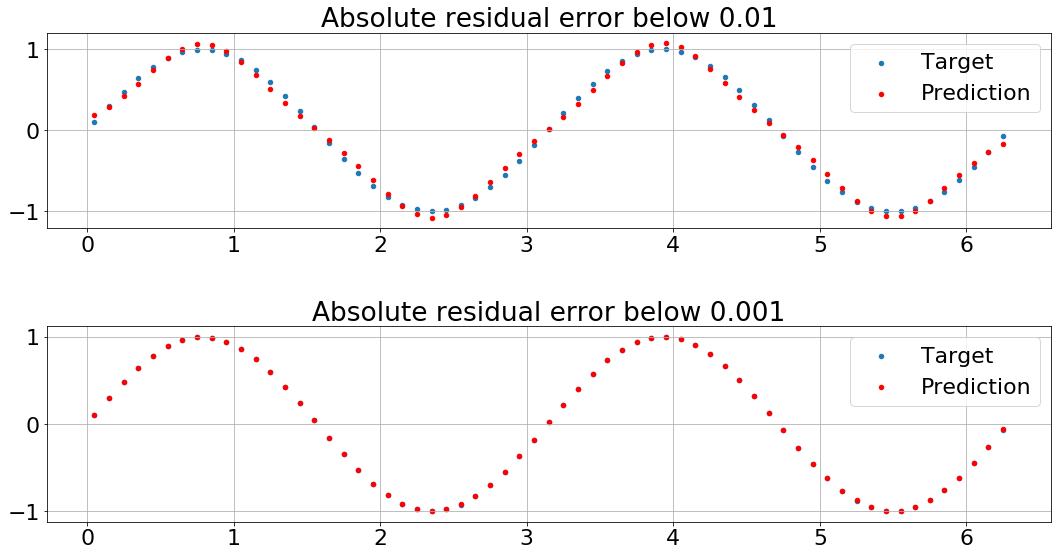

In [23]:
fig, axs = plt.subplots(2)
axs[0].set_title("Absolute residual error below 0.01")
axs[0].scatter(test_inputs, test_outputs, s=20,label = 'Target')
axs[0].scatter(test_inputs, results001, c='r', s=20, label = 'Prediction')
axs[0].grid()
axs[0].legend()

axs[1].set_title("Absolute residual error below 0.001")
axs[1].scatter(test_inputs, test_outputs, s=20,label = 'Target')
axs[1].scatter(test_inputs, results0001, c='r', s=20, label = 'Prediction')
axs[1].grid()
axs[1].legend()

plt.subplots_adjust(hspace = 0.5)
plt.show()

# Estimating square (2x)¶

In [24]:
def square_function(x):
    sin_x = np.sin(x)
    return np.array([1.0 if val >= 0.0 else -1.0 for val in sin_x])

In [25]:
train_inputs = np.arange(0.1, 2*np.pi, 0.1)
train_outputs = square_function(2*train_inputs)

test_inputs = np.arange(0.05, 2*np.pi, 0.1)
test_outputs = square_function(2*test_inputs)

In [26]:
rbf_nn = rbf_network()

## Absolute_residual_error below 0.1

In [27]:
centers = np.arange(0, 2.0*np.pi, 0.2)
variance = 0.1
print(centers)
rbf_nn.fit(train_inputs, train_outputs, centers, variance)
results01 = rbf_nn.predict(test_inputs)
absolute_residual_error(test_outputs, results01)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6.  6.2]


0.08577159059894222

## Absolute_residual_error below 1

In [40]:
# centers = np.arange(0.5, 2*np.pi, 0.1)
centers = np.arange(0, 2*np.pi, 0.1)
variance = 0.1
# print(centers)
rbf_nn.fit(train_inputs, train_outputs, centers, variance)
results1 = rbf_nn.predict(test_inputs)
absolute_residual_error(test_outputs, results1)

0.13441663688694447

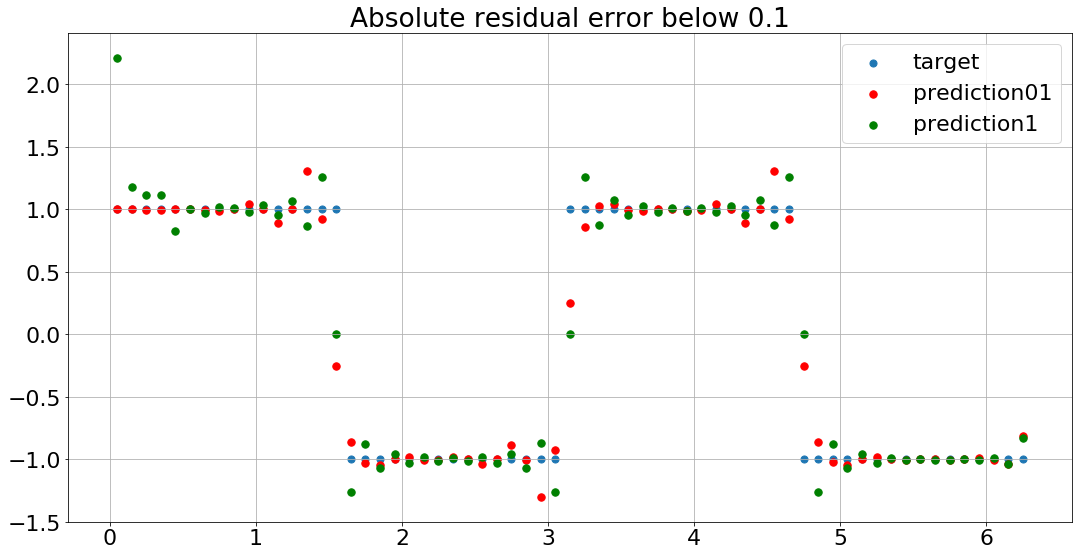

In [41]:
plt.title("Absolute residual error below 0.1")

plt.scatter(test_inputs, test_outputs, s=50, label = 'target')
plt.scatter(test_inputs, results01, c='r', s=55, label = 'prediction01')
plt.scatter(test_inputs, results1, c='g', s=55, label = 'prediction1')
plt.legend()
plt.grid()
plt.show()

This dataset is not particularly suitable for rbf networks. Every other training point had to be used, so the data is massively overfitted. This way, the absolute residual error is below 0.1. Perfect result can be reached by tresholding at 0, by applying a sigmoid function. That would make this problem very similar to a classification.